# Time Series

## Riferimento temporale

Le differenze tra i dati di `serie temporali (time series)` e i `dati statici (puntuali)` si basano principalmente sul **contesto temporale e sull'evoluzione delle osservazioni**. 

### Riferimento temporale - Dati Time Series
1. Dati Time Series: sono raccolti nel tempo, con ogni osservazione associata a un `timestamp` o a una sequenza temporale (ad esempio, dati mensili, giornalieri, orari). 
Lo **scopo principale è analizzare come i valori cambiano o si evolvono nel tempo. **

*Esempio: Temperature registrate ogni ora, vendite mensili di un prodotto, o pressione della caldaia misurata ogni minuto.*
*

**Analisi tipiche:**
* Trend (crescente, decrescente)
* Stagionalità (ripetizioni periodiche)
* Modelli predittivi (es. ARIMA, Prophet)
* Anomaly detection
* Aggregazioni temporali (media mensile, somma annuale)

### Dati puntuali 
2. Dati Puntuali (Statici): sono istantanei, rappresentano una misura o osservazione in un **momento specifico senza alcun riferimento alla variazione temporale.** I dati statici rappresentano osservazioni istantanee, raccolte in un singolo momento o senza una sequenza temporale rilevante. 

*Esempio: L'altezza media degli studenti di una classe, o il bilancio finanziario a fine anno.*

**Analisi tipiche:**
* Statistiche descrittive (media, mediana, deviazione standard)
* Analisi esplorativa dei dati (EDA)
* Confronti tra gruppi (test t, ANOVA)
* Regressioni statiche (lineare, logistica)

## Dinamica vs Statica

1. Time Series: Mostrano una dinamica e un'evoluzione. Qui si studiano trend, stagionalità, anomalie, e relazioni temporali. 

*Esempio: Monitorare il consumo energetico per individuare picchi di utilizzo in certi momenti della giornata.*

2. Dati Puntuali: Sono statistici e forniscono uno stato attuale o una misura istantanea, spesso usati per snapshot o analisi descrittive. 

*Esempio: Il numero di studenti iscritti a una scuola in un dato anno*

## Dipendenza Temporale
1. Time Series: Le osservazioni sono dipendenti dal tempo, ovvero il valore futuro potrebbe dipendere da quelli passati. 

*Esempio: Il livello di pressione nella caldaia dipende dal livello precedente e dai fattori di utilizzo.*

2. Dati Puntuali: Le osservazioni sono indipendenti dal tempo. Non vi è alcuna relazione temporale implicita. \
*Esempio: La temperatura corporea media di un gruppo di persone non è influenzata dalle misurazioni precedenti.*


In [16]:
import pandas as pd

df = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo&datatype=csv")

df.head(5)

,timestamp,open,high,low,close,volume
0,2025-05-30,258.75,260.1200,257.10,259.06,9668923
1,2025-05-29,260.75,261.1300,256.77,258.69,2295228
2,2025-05-28,263.16,265.0000,259.94,260.24,2318437
3,2025-05-27,261.00,263.7869,259.63,263.23,3284216
4,2025-05-23,258.58,259.8696,255.79,258.63,2722721


close è il dato che ci interessa perchè è la chiusura giornaliera. 

In [17]:
df['timestamp']

0     2025-05-30
1     2025-05-29
2     2025-05-28
3     2025-05-27
4     2025-05-23
         ...    
95    2025-01-13
96    2025-01-10
97    2025-01-08
98    2025-01-07
99    2025-01-06
Name: timestamp, Length: 100, dtype: object

## `Timestamp` e `Datetime`
`Timestamp` è un singolo istante temporale, mentre `datetime` è più generale e può includere insiemi o serie temporali.

* `Timestamp` rappresenta un momento specifico nel tempo: è un valore univoco che indica una data e un'ora precisa.
Esempio: "2023-12-07 15:30:45" rappresenta un singolo istante.

* `Datetime` è un tipo di dato generico che rappresenta combinazioni di data e ora, ma non è limitato a un singolo momento: può rappresentare un insieme di timestamp (una colonna in un DataFrame) o operazioni temporali.
Esempio: Una serie temporale contenente date e orari.


## `pd.to_datetime()`
`pd.to_datetime(df.timestamp)` converte la colonna `timestamp` del DataFrame `df` in formato `datetime` leggibile (`datetime64[ns]`), in questo modo possiamo effettuare:

* operazioni temporali (come resampling, filtraggio per data, estrazione di anno/mese/giorno, ecc.)
* formattazioni più chiare per grafici o esportazione.

Questo comando funziona se la colonna df['timestamp'] contiene uno dei seguenti:
+ Numeri interi/floating point → timestamp Unix (secondi o millisecondi da Epoch)
+ Stringhe formattate → tipo "2025-05-31 14:23:00"

In [18]:
df['timestamp'] = pd.to_datetime(df.timestamp)

df.head(10)

,timestamp,open,high,low,close,volume
0,2025-05-30,258.75,260.1200,257.1000,259.06,9668923
1,2025-05-29,260.75,261.1300,256.7700,258.69,2295228
2,2025-05-28,263.16,265.0000,259.9400,260.24,2318437
3,2025-05-27,261.00,263.7869,259.6300,263.23,3284216
4,2025-05-23,258.58,259.8696,255.7900,258.63,2722721
5,2025-05-22,260.77,261.2711,257.9100,258.37,3091253
6,2025-05-21,264.97,265.6499,260.4100,260.87,3753904
7,2025-05-20,267.40,269.2800,265.6201,266.95,2437860
8,2025-05-19,265.45,269.1350,265.0800,268.41,3198903
9,2025-05-16,266.35,267.9800,264.5900,266.76,3817937


In [19]:
df['timestamp']

0    2025-05-30
1    2025-05-29
2    2025-05-28
3    2025-05-27
4    2025-05-23
        ...    
95   2025-01-13
96   2025-01-10
97   2025-01-08
98   2025-01-07
99   2025-01-06
Name: timestamp, Length: 100, dtype: datetime64[ns]

## Impostazione indice temporale
Assegno la colonna `timestamp` come indice del DataFrame df e ne traccio la serie temporale della colonna `close`.

In questo modo 
1. Impostazione dell'indice temporale: Utilizzando `df.index = df.timestamp`, impostiamo un `DatetimeIndex`, che è fondamentale per sfruttare le funzionalità avanzate di Pandas per le serie temporali, come il slicing temporale e il resampling.
2. Tracciamento della serie temporale: con `df['close'].plot()`, Pandas utilizza automaticamente l'indice temporale per l'asse x, rendendo il grafico più informativo e leggibile.

### Vantaggi rispetto a un indice auto-incrementale
Utilizzare `DatetimeIndex` offre numerosi vantaggi rispetto a un indice numerico auto-incrementale:
* **Slicing temporale intuitivo**: possiamo selezionare facilmente sottoinsiemi di dati basati su date specifiche.
* **Resampling semplice:** possiamo cambiare la frequenza dei dati (ad esempio, da giornaliera a mensile) utilizzando metodi come `resample()`.
* **Operazioni temporali avanzate:** Facilita l'esecuzione di operazioni come il calcolo di medie mobili, differenze temporali e altro.

#### Approccio auto-incrementale
L’approccio auto-incrementale in un contesto di DataFrame o database indica l’uso di un indice numerico che cresce automaticamente, riga per riga, partendo da zero (o da un numero iniziale definito).

            timestamp    open      high     low   close   volume
timestamp                                                       
2025-05-30 2025-05-30  258.75  260.1200  257.10  259.06  9668923
2025-05-29 2025-05-29  260.75  261.1300  256.77  258.69  2295228
2025-05-28 2025-05-28  263.16  265.0000  259.94  260.24  2318437
2025-05-27 2025-05-27  261.00  263.7869  259.63  263.23  3284216
2025-05-23 2025-05-23  258.58  259.8696  255.79  258.63  2722721


<Axes: xlabel='timestamp'>

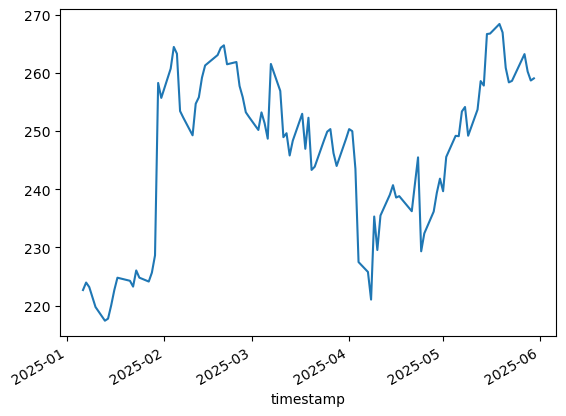

In [20]:
df.index = df.timestamp

print(df.head())

df['close'].plot()

La colonna `timestamp` diventa l'indice temporale del DataFrame. \
Visualizziamo l’andamento della colonna close (es. prezzo di chiusura) nel tempo.

            timestamp    open      high     low   close   volume
timestamp                                                       
2025-05-30 2025-05-30  258.75  260.1200  257.10  259.06  9668923
2025-05-29 2025-05-29  260.75  261.1300  256.77  258.69  2295228
2025-05-28 2025-05-28  263.16  265.0000  259.94  260.24  2318437
2025-05-27 2025-05-27  261.00  263.7869  259.63  263.23  3284216
2025-05-23 2025-05-23  258.58  259.8696  255.79  258.63  2722721


<Axes: xlabel='timestamp'>

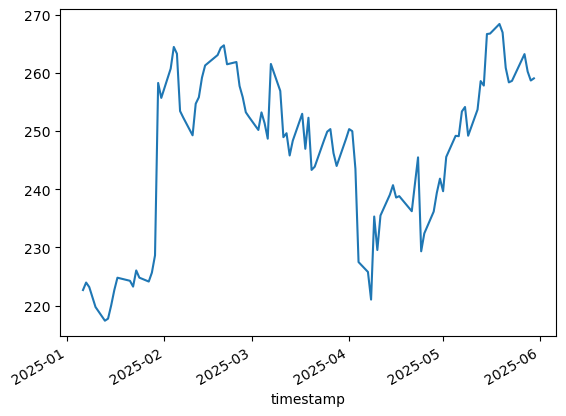

In [10]:
df.index = df.timestamp

print(df.head())

df['close'].plot()

### In alternativa

In [11]:
import pandas as pd
one_step = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo&datatype=csv" \
                       , parse_dates=['timestamp'], index_col = 'timestamp')

one_step.head()

,open,high,low,close,volume
timestamp,,,,,
2025-05-30,258.75,260.1200,257.10,259.06,9668923
2025-05-29,260.75,261.1300,256.77,258.69,2295228
2025-05-28,263.16,265.0000,259.94,260.24,2318437
2025-05-27,261.00,263.7869,259.63,263.23,3284216
2025-05-23,258.58,259.8696,255.79,258.63,2722721


### Il punto centrale del dataset
`midpoint = df.index[int(len(df)/2)]`
* `len(df)`: calcola quante righe ci sono.
* `int(len(df)/2)`: trova l’indice numerico a metà del dataset.
* `df.index[...]`: estrae la data corrispondente a quella posizione centrale.

### Definiamo una finestra temporale
`window = pd.Timedelta(days=30)`
* `pd.Timedelta(days=30)`: crea un intervallo di 30 giorni.
* È un oggetto `timedelta` compatibile con le date.

### Eseguiamo lo slicing temporale su `midpoint`
`sample = df[midpoint - window : midpoint + window]`
* Estrae tutte le righe comprese tra 30 giorni prima e 30 giorni dopo il punto centrale.
* Il risultato è una sottoselezione temporale (sample) del DataFrame originale.


In [30]:
midpoint = df.index[int(len(df)/2)]
window = pd.Timedelta(days=30)

sample = df[midpoint - window : midpoint + window]
print(sample.head())

            timestamp     open     high     low   close   volume
timestamp                                                       
2025-02-18 2025-02-18  261.930  263.965  259.83  263.07  4262812
2025-02-19 2025-02-19  262.000  264.360  260.09  264.32  3718678
2025-02-20 2025-02-20  263.650  265.090  262.15  264.74  4884805
2025-02-21 2025-02-21  263.845  264.830  261.10  261.48  5667874
2025-02-24 2025-02-24  261.500  263.845  259.58  261.87  4398107


## Indexing e slicing basato sul tempo

Seleziona un intervallo temporale dal DataFrame con indice temporale ordinato (DatetimeIndex).

* Il `df` deve avere l’indice in formato `DatetimeIndex` (es. df.index contiene date/ore).
* L’indice deve essere ordinato cronologicamente (df.sort_index()).

### Cosa fa
1. Estrae tutte le righe di df il cui indice è una data compresa tra il 1 dicembre 2024 e il 1 novembre 2025.
2. Seleziona intervalli precisi: lo slicing con date include entrambe le estremità (se esistono nel dataset).

In [34]:
sample = df['2024-12-01':'2025-11-01']
sample.head(10)

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2025-01-06,2025-01-06,223.000,224.3500,220.7500,222.67,2847128
2025-01-07,2025-01-07,223.350,226.7110,222.8300,223.96,3299701
2025-01-08,2025-01-08,223.910,224.9000,220.8300,223.18,2619768
2025-01-10,2025-01-10,222.000,222.4300,216.8000,219.75,3570497
2025-01-13,2025-01-13,217.890,219.5900,214.7500,217.40,3716816
2025-01-14,2025-01-14,218.000,218.1250,214.6100,217.75,3485829
2025-01-15,2025-01-15,220.870,221.6761,218.0100,220.03,2951825
2025-01-16,2025-01-16,219.690,222.6800,217.3800,222.66,3329060
2025-01-17,2025-01-17,225.955,225.9550,223.6400,224.79,5506837


In [32]:
df.timestamp.dt.month

timestamp
2025-01-06    1
2025-01-07    1
2025-01-08    1
2025-01-10    1
2025-01-13    1
             ..
2025-05-23    5
2025-05-27    5
2025-05-28    5
2025-05-29    5
2025-05-30    5
Name: timestamp, Length: 100, dtype: int32

In [33]:
df.timestamp.dt.day

timestamp
2025-01-06     6
2025-01-07     7
2025-01-08     8
2025-01-10    10
2025-01-13    13
              ..
2025-05-23    23
2025-05-27    27
2025-05-28    28
2025-05-29    29
2025-05-30    30
Name: timestamp, Length: 100, dtype: int32

In [35]:
start = df['timestamp'].iloc[10]
stop = df['timestamp'].iloc[20]

sample = df[start:stop]

sample.head()

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2025-01-22,2025-01-22,221.98,224.4000,220.35,223.26,4759490
2025-01-23,2025-01-23,223.94,226.0400,223.15,226.04,3619651
2025-01-24,2025-01-24,225.27,226.8104,223.80,224.80,3233293
2025-01-27,2025-01-27,222.19,224.3000,219.84,224.13,4898355
2025-01-28,2025-01-28,224.32,225.7700,221.77,225.66,4485429


# Cos'è la Stationarity e perchè è così importante?

Molti modelli di previsione (es. ARIMA) richiedono stazionarietà per funzionare correttamente. Se i dati non sono stazionari, bisogna trasformarli (es. con differenze) prima di applicare il modello.

# Definizione stationarity
Una serie temporale si definisce **stazionaria** se le proprietà statistiche, come media, varianza e autocorrelazione, non cambiano nel tempo.

- **Media costante:** La media della serie non è una funzione del tempo.

- **Varianza costante:** La varianza della serie è una funzione del tempo. Questa proprietà è nota come omoscedasticità - > **La dispersione dei valori (volatilità) resta stabile**. 

- **Covarianza costante:** La covarianza del termine i-esimo e del termine (i+m)-esimo termine non è una funzione del tempo.

### Caratteristiche
1. Non mostra un trend evidente o una stagionalità (a meno che queste siano state rimosse).
2. Le oscillazioni intorno alla media sono relativamente costanti.
3. È necessaria per molte tecniche di analisi e modellazione, come l'ARIMA, che assumono la stazionarietà.


# Trend
**Definizione:** Il trend rappresenta una variazione a lungo termine nella media della serie temporale: è una direzione generale (crescente o decrescente) che i dati seguono nel tempo.
 + **Caratteristiche**: può essere **lineare** (es. un aumento costante nel tempo) o **non lineare** (es. una crescita esponenziale o un ciclo). È spesso il risultato di fattori come crescita economica, cambiamenti stagionali cumulativi o modifiche strutturali.
 
*Esempio:* Un trend può essere visibile in dati come il PIL di un paese, che tende ad aumentare nel tempo, o nei dati delle temperature globali, che mostrano un riscaldamento globale.

# Due Dataset a confronto

<Axes: title={'center': 'HR Data'}>

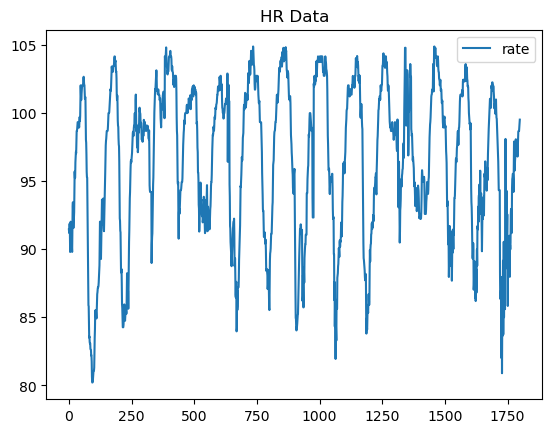

In [36]:
hr = pd.read_csv("https://raw.githubusercontent.com/alyssaq/python-data-science-intro/master/datasets/heart-rate-time-series.csv", header=None)
hr.columns = ['rate']

hr.plot(title='HR Data')

# La storia di due set di dati

<Axes: title={'center': 'Stock Data'}, xlabel='timestamp'>

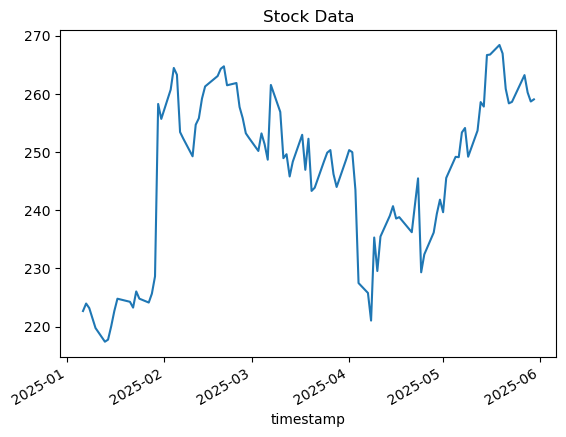

In [37]:
df['close'].plot(title='Stock Data')

# Test di stazionarietà

# Augmented Dickey-Fuller (ADF) Test

Il test ADF è uno dei test statistici più popolari per verificare la stazionarietà di una serie temporale.

Il test ADF ci aiuta a capire se possiamo modellare direttamente una serie o se dobbiamo prima trasformarla (es. differenza o log): è uno strumento chiave per chi lavora con dati temporali.

> **La serie si muove intorno ad una media stabile oppure cambia nel tempo?**

L'ipotesi nulla del test ADF è che la serie temporale non sia stazionaria a causa della presenza di una radice unitaria.

$ 
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \delta_1 \Delta Y_{t-1} + \ldots + \delta_{p-1} \Delta Y_{t-p+1} + \epsilon_t
$

Dove:
- $\Delta Y_t$ e la serie di differenze
- $\alpha$, $\beta$, and $\gamma$ sono i coefficienti 
- $p$ È il numero di lag, ovvero indica un ritardo temporale, ossia un'osservazione passata della serie temporale. E' il termine per correggere l'autocorrelazione dei residui. 
- $\epsilon_t$ rappresenta l'errore ed è definito il rumore bianco. 

# In pratica
1. Il test ADF prende la serie e guarda:
* Se i valori futuri dipendono troppo dai valori passati → **non è stazionaria.**
* Se la serie “torna indietro” verso una media stabile, allora **è stazionaria.**

2. Il test ADF parte con una ipotesi di default (`ipotesi nulla`): la serie non è stazionaria (ha una radice unitaria).

3. Il test ADF fa dei calcoli: se i risultati contraddicono questa ipotesi, allora la rifiuta e conclude: -> La serie è stazionaria.

# I lag
Un lag è un valore passato della stessa serie.

*Esempio*: se oggi è il giorno 𝑡, allora:
* `lag 1` è il valore al giorno `t-1`
* `lag 2` è il valore al giorno `t-2`
* ecc.

Utilizziamo i lag per gestire l'autocorrelazione, ovvero il fatto che i valori attuali dipendano dai valori passati.



I **lag nel ADF Test (Augmented Dickey-Fuller Test)** sono una componente cruciale per il calcolo corretto della statistica del test. 
1. Essi servono a gestire l'autocorrelazione nella serie temporale e a migliorare l'accuratezza del test.
2. Senza lag il test potrebbe non distinguere tra stazionarità e non stazionarità. 
3. I lag aiutano a ridurre l'autocorrelazione dei residui. 

### Numero dei lag
Il numero dei lag influisce direttamente sul test e va scelto con attenzione: troppi lag riducono la potenza del test, mentre pochi lag non consentono al test di correggere l'autocorrelazione dei residui. 


### Riepilogo 
I lag nel test ADF sono come gli `"occhiali correttivi"` del test perchè ci aiutano a vedere se la serie è veramente stazionaria, eliminando la confusione dovuta alla dipendenza dai valori passati.

I lag servono a: 
* "Pulire” i residui da autocorrelazione → per avere un test statisticamente corretto
* Rendere più robusta l’analisi, anche in presenza di fluttuazioni brevi
* Stabilizzare il comportamento dei valori quando c’è rumore o ciclo
* Un lag rappresenta il ritardo di una variabile rispetto al suo valore passato. 

> Il lag è un **input**, la differenza ovvero la variazione tra due valori (t e t-1) è un risultato. Non possiamo calcolare la differenza senza lag


# Autocorrelazione 

**L'autocorrelazione** in una serie temporale è quando **i valori passati della serie influenzano i valori presenti.**

1. E'una misura di quanto un valore nella serie sia correlato con i suoi valori precedenti (ritardati o lag). 
2. Nel contesto dell'ADF Test (Augmented Dickey-Fuller), l'autocorrelazione è importante perché, se non viene considerata, può portare a risultati fuorvianti sullo stato di stazionarietà della serie.
3. Se c'è autocorrelazione, i residui del modello non sono indipendenti. Questo viola l'assunzione di indipendenza degli errori, compromettendo la validità del test.
4. Se l'autocorrelazione non viene corretta, il test potrebbe confondere un comportamento di random walk (non stazionario) con una stazionarietà apparente.


# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
E' un test simile all'ADF, ma con una logica opposta:
1. ADF: ipotesi nulla -> La serie non è stazionaria.
2. KPSS: ipotesi nulla -> La serie è stazionaria. 

### Ipotesi nulla: i dati sono stazionari
Il test KPSS è un altro test popolare per la stazionarietà, in cui l'ipotesi nulla è che i dati siano stazionari attorno a una tendenza deterministica.

Il KPSS controlla **se una serie oscilla stabilmente attorno a una linea**, anche se quella linea non è piatta (cioè può avere una tendenza).

$
Y_t = \alpha + \beta t + \rho Y_{t-1} + \epsilon_t
$

Where:
- $Y_t$ è la time series
- $\alpha$ e $\beta$ sono i coefficienti
- $\rho$ è il parametro autoregressivo
- $\epsilon_t$ è il termine di errore 

# KPSS 

1. Il KPSS Test è un test statistico utilizzato per verificare la stazionarietà di una serie temporale.
2. È complementare all'ADF Test e spesso viene usato insieme per avere una diagnosi più completa della stazionarietà.
3. A differenza dell'ADF Test, che testa se una serie è non stazionaria (ha una radice unitaria), il KPSS Test verifica se una serie è stazionaria attorno a una media costante o a un trend lineare.
4. Il KPSS Test stima la stazionarietà verificando la presenza di una **componente di trend deterministico nella serie temporale.** 

> **A differenza dell'ADF Test, il KPSS si concentra sulla stazionarietà attorno a un valore medio o un trend lineare.**

Insieme all'ADF Test, offre un'analisi complementare per identificare la natura della non stazionarietà (trend stocastico vs deterministico), utile per la modellazione e la previsione delle serie temporali.


## Ipotesi Nulla(H0):
* La serie è stazionaria attorno ad una media costante(o ad un trend lineare).
* La componente random walk non è presente, Rt=0

## Ipotesi Alternativa(H1):
* La serie non è stazionaria. 
* E' presente una componente random walk. 

## p-value
+ `se p<0.05`: rifiutiamo H0, la serie non è stazionaria 
+ `se p>0.05`: non possiamo rifiutare H0, la serie è stazionaria. 

> Se il p-value è basso, significa che la serie si allontana troppo → quindi non è stazionaria.

# Il Test ADF

In [38]:
from statsmodels.tsa.stattools import adfuller

result_adf_stock = adfuller(df['close']) # prima serie temporale
result_adf_hr = adfuller(hr) # seconda serie temporale

print(f'ADF Statistic Stock: {result_adf_stock[0]}') # valore ADF calcolato nel test
print(f'p-value: {result_adf_stock[1]}') # p-value
print('Critical Values:')
for key, value in result_adf_stock[4].items(): # valori critici
    print(f'\t{key}: {value}')

print("---------------------------")
    
print(f'ADF Statistic HR: {result_adf_hr[0]}')
print(f'p-value: {result_adf_hr[1]}')
print('Critical Values:')
for key, value in result_adf_hr[4].items():
    print(f'\t{key}: {value}') 

ADF Statistic Stock: -2.2449044588427984
p-value: 0.1903530547665238
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
---------------------------
ADF Statistic HR: -7.4553679461505284
p-value: 5.530513601228041e-11
Critical Values:
	1%: -3.4340373743018104
	5%: -2.8631687706662676
	10%: -2.567637106781613


# Serie stock
1. Il p-value = 0.19 è maggiore di 0.05 → non possiamo rifiutare l'ipotesi nulla.
2. La serie Stock NON è stazionaria.
3. Il valore ADF (-2.24) è maggiore di tutti i valori critici (−3.49, −2.89, −2.58) → conferma che la serie non è stazionaria.

# Serie hr
1. Il p-value è quasi zero → rifiutiamo l'ipotesi nulla con certezza.
2. La serie HR è stazionaria.
3. Il valore ADF (−7.45) è molto più basso di tutti i valori critici → conferma la forte stazionarietà.

# Alcune osservazioni
Una serie temporale non stazionaria può apparire stazionaria in un determinato intervallo di tempo. 

> Questo fenomeno si verifica perché la **stazionarietà è una proprietà che può variare nel tempo, soprattutto in serie temporali complesse.**


### Cambiamenti a breve termine rispetto alla lunga durata:
Una serie con un trend o stagionalità può mostrare caratteristiche stazionarie in un intervallo di tempo breve, dove il trend o la stagionalità sono meno evidenti. 

*Esempio: Una serie con un trend crescente lineare può sembrare stazionaria se osservata su un intervallo di tempo molto piccolo.*

### Presenza di comportamenti stazionari locali:
Alcune serie temporali sono stazionarie solo in specifici intervalli di tempo (processi quasi-stazionari o regimi locali stazionari). 

*Esempio: Il mercato azionario può mostrare un comportamento stazionario durante un periodo stabile (senza crisi o espansione), ma diventare non stazionario durante una crisi economica.*

### Cambiamenti strutturali:
La serie può subire cambiamenti strutturali o regimi, come un mutamento di politica economica o un evento straordinario, che la rendono temporaneamente stazionaria. 

*Esempio: I prezzi energetici potrebbero essere stazionari in un periodo di stabilità politica, ma diventare non stazionari durante una crisi energetica.*

### Effetti stagionali o ciclici:
Una serie stagionale potrebbe sembrare stazionaria se osservata in una specifica finestra temporale in cui la stagionalità è costante.

*Esempio: I consumi energetici possono essere stabili durante i mesi invernali ma variabili su tutto l'anno.*

### Filtro o manipolazione dei dati:
Applicando un filtro o una trasformazione (come differenziazione o media mobile), la serie può sembrare stazionaria temporaneamente.

*Esempio: Una serie differenziata può risultare stazionaria localmente anche se la serie originale non lo era.*

# Il Test KPSS

In [43]:
from statsmodels.tsa.stattools import kpss

result_adf_stock = kpss(df['close'], nlags="auto") # auto permette al test di scegliere automaticament N lag
result_adf_hr = kpss(hr, nlags="auto")


print(f'KPSS Statistic: {result_adf_stock[0]}')
print(f'p-value: {result_adf_stock[1]}')
print('Critical Values:')
for key, value in result_adf_stock[3].items():
    print(f'\t{key}: {value}')
    
print("---------------------------")

print(f'KPSS Statistic: {result_adf_hr[0]}')
print(f'p-value: {result_adf_hr[1]}')
print('Critical Values:')
for key, value in result_adf_hr[3].items():
    print(f'\t{key}: {value}')

KPSS Statistic: 0.3418924559707821
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
---------------------------
KPSS Statistic: 0.08162807985106502
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_60023/1387073819.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_adf_stock = kpss(df['close'], nlags="auto")
/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_60023/1387073819.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_adf_hr = kpss(hr, nlags="auto")


# Serie stock
* La statistica (0.3419) è sotto tutti i valori critici.
* Il p-value è 0.1, quindi maggiore di 0.05 → non rifiuti l'ipotesi nulla.
* La serie close è stazionaria (attorno a una tendenza) secondo il test KPSS.

# Serie hr
* La statistica è molto bassa.
* Il p-value è alto, quindi non possiamo rifiutare l’ipotesi nulla.
* La serie hr è anch'essa stazionaria secondo KPSS.


Se i test ADF e Kpss sono in disaccordo è utile trasformare la serie (differenze) e ritestare. 

# Come sistemiamo i dati che non sono stazionari?

# Differencing

La differenziazione (o differencing) è una tecnica utilizzata nell’analisi delle serie temporali per rendere una serie stazionaria: implica trasformare la serie calcolando le differenze tra le osservazioni consecutive.

1. La differenziazione serve per trasformare una serie non stazionaria in una stazionaria, rendendola adatta alla modellazione e previsione.

2. È il processo di sottrarre ogni valore della serie dal valore precedente, per rimuovere trend o stagionalità.

> La differenziazione serve per trasformare una serie non stazionaria in una stazionaria, rendendola adatta alla modellazione e previsione.


### Differenze del primo ordine

La prima differenza è data dalla seguente equazione:

$ 
\Delta Y_t = Y_t - Y_{t-1}
$


Eseguo la differenziazione della serie `df["close"].
1. Ordino il DataFrame in base all'indice: è fondamentale prima di calcolare le differenze, perchè garantisce che i valori siano ordinati cronologicamente. 
2. Calcolo la differenza tra ogni valore ed il precedente nella serie `close`.
3. Rimuovo i NaN.

Ho creato una nuova serie stazionaria (o quasi), che rappresenta le variazioni giornaliere del prezzo

Eseguo il test ADF su new_station_data per verificare se ora è stazionaria

In [44]:
df = df.sort_index()
new_station_data = df['close'].diff()
new_station_data = new_station_data.dropna()
new_station_data.head()

timestamp
2025-01-07    1.29
2025-01-08   -0.78
2025-01-10   -3.43
2025-01-13   -2.35
2025-01-14    0.35
Name: close, dtype: float64

In [46]:
result_adf_stock = adfuller(new_station_data)
result_kpss_stock = kpss(new_station_data, nlags="auto")

print(f'ADF Statistic Stock: {result_adf_stock[0]}')
print(f'p-value: {result_adf_stock[1]}')
print('Critical Values:')
for key, value in result_adf_stock[4].items():
    print(f'\t{key}: {value}')
    
print("---------------------------")

print(f'KPSS Statistic: {result_kpss_stock[0]}')
print(f'p-value: {result_kpss_stock[1]}')
print('Critical Values:')
for key, value in result_kpss_stock[3].items():
    print(f'\t{key}: {value}')
    

ADF Statistic Stock: -10.494838720706937
p-value: 1.1224979244274618e-18
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157
---------------------------
KPSS Statistic: 0.07497494651416375
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_60023/1054821713.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss_stock = kpss(new_station_data, nlags="auto")


# Interpretazione ADF:
1. L'ipotesi nulla (H₀) del test ADF è: la serie non è stazionaria.
2. Se la statistica ADF è più bassa (più negativa) del valore critico, si rifiuta H₀.

* -10.495 < -3.499 → rifiutiamo l'ipotesi nulla
* p-value < 0.05 → conferma la decisione
* Conclusione: la serie è stazionaria secondo il test ADF.


# Interpretazione KPSS:
1. L'ipotesi nulla (H₀) del test KPSS è: la serie è stazionaria (attorno a una media o tendenza).
2. Se la statistica è inferiore ai valori critici, non si rifiuta H₀.

* 0.074 < 0.347 → la statistica è ben sotto tutti i valori critici
* p-value = 0.1 → molto alto → non rifiutiamo l'ipotesi nulla
* Conclusione: anche secondo il test KPSS, la serie è stazionaria.


La serie differenziata è stazionaria, secondo entrambi i test.

<Axes: title={'center': 'Stock Data'}, xlabel='timestamp'>

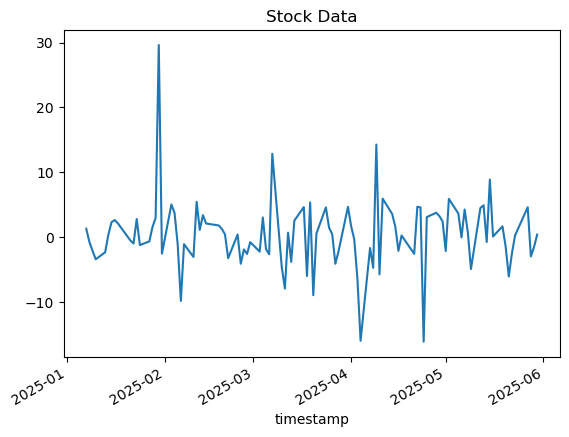

In [47]:
new_station_data.plot(title='Stock Data')